Dummy AUC: 0.50
Model AUC: 0.93


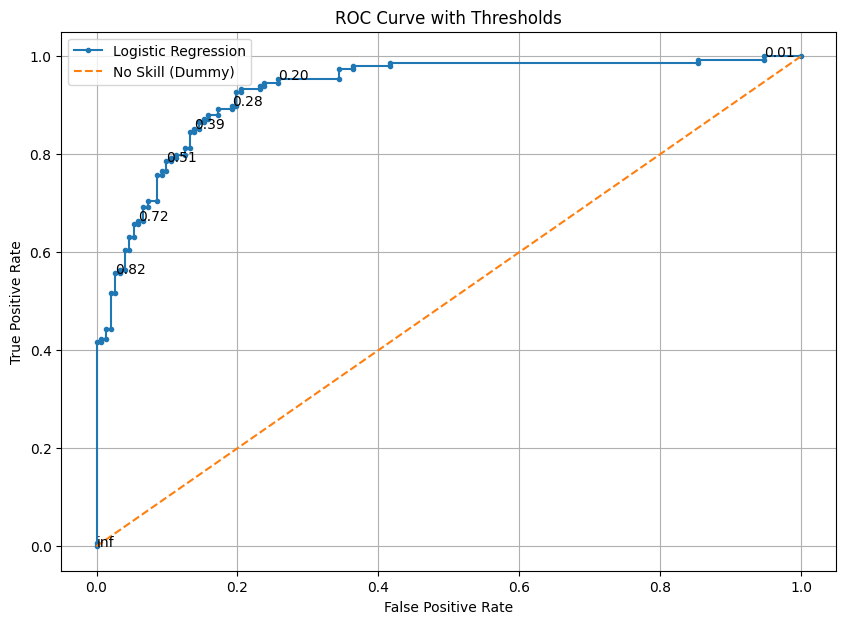

In [6]:
# 🔢 1. Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Explain
# matplotlib.pyplot as plt: Used to plot graphs like the ROC curve.
# numpy: Used for numerical operations (not directly used here, but often handy).
# make_classification: Creates a sample (fake) classification dataset.
# LogisticRegression: Machine learning model for binary classification.
# train_test_split: Splits the dataset into training and testing parts.
# roc_auc_score: Measures the quality of the classifier using ROC AUC.
# roc_curve: Generates data to plot the ROC curve.

# 🧪 2. Create a Sample Dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_informative=2, 
                           n_redundant=0, random_state=42, flip_y=0.01)
# Explain
# X, y: X is the input features; y is the target (0 or 1).
# n_samples=1000: Create 1000 data points.
# n_classes=2: Binary classification (class 0 or 1).
# n_informative=2: Two useful features to determine the class.
# n_redundant=0: No unnecessary features.
# random_state=42: For consistent results every time.
# flip_y=0.01: 1% of labels are randomly flipped to introduce noise.

# 🧩 3. Split the Dataset
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Splits data into training (70%) and testing (30%).
# X_train, y_train: Used to train the model.
# X_test, y_test: Used to test how well the model works.

# 🤖 4. Dummy Model (Always Predicts 0)
 
dummy_probs = [0 for _ in range(len(y_test))]
dummy_probs
# This creates a list of zeros for each test example.
# A "dummy" model that always predicts probability = 0 for class 1.
# Helps us compare how bad a no-skill model would perform.

#Output
# [0,
#  0,
#  0,
#  0,
#  0,
#  0,
#  0,
#  0,]

# 📊 5. Train Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)
# model = LogisticRegression(): Create the logistic regression model.
# model.fit(...): Train the model using training data.

# 🎯 6. Predict Probabilities for Class 1

#Prediction based on Probability
model_probs = model.predict_proba(X_test)
#let focus on positive
model_probs =model_probs[:, 1]
model_probs #Output: array([0.53188087, 0.93123295, 0.65908578, 0.63968601, 0.0292544])
# predict_proba: Returns the probability of class 0 and class 1.
# [:, 1]: Take only the probabilities for class 1 (positive class).

# 📐 7. Compute AUC Scores

dummy_auc = roc_auc_score(y_test, dummy_probs)
model_auc = roc_auc_score(y_test, model_probs)
print(f"Dummy AUC: {dummy_auc:.2f}")
print(f"Model AUC: {model_auc:.2f}")

# Dummy AUC: 0.50
# Model AUC: 0.93

# roc_auc_score(...): Measures how good the model is at separating the two classes.
# Dummy AUC should be near 0.5 (random guess).
# Model AUC should be higher (closer to 1 is better).\
# print(...): Show the results.


# 📈 8. Get ROC Curve Point

fpr, tpr, thresholds = roc_curve(y_test, model_probs)

# roc_curve(...): Calculates:
# fpr: False Positive Rate
# tpr: True Positive Rate
# thresholds: Probability cutoffs used to classify between 0 and 1

# 🖼️ 9. Plot ROC Curve + Thresholds
 
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill (Dummy)')

# figure(...): Sets the size of the plot.
# plot(fpr, tpr): Plots the ROC curve.
# plot([0,1], [0,1]): Dashed line for reference (random guess).

# ✍️ 10. Annotate Thresholds on ROC Curve
 
for i in range(0, len(thresholds), 10):
    plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]))

# Adds threshold values on the curve to help choose the best cutoff.
# Annotate every 10th point to keep the graph readable.

# 🧾 11. Final Plot Settings
 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend()
plt.grid(True)
plt.show()

# Label the axes and title the plot.
# legend(): Show labels for curves.
# grid(True): Adds gridlines to the plot.
# show(): Displays the final plot.



